# EA3 Practico
Integrantes:
- Sebastián Loncón

## 1. Comprensión del negocio

El objetivo de esta fase es explorar técnicas de aprendizaje no supervisado para complementar el modelo de scoring crediticio, en donde buscaremos identificar patrones ocultos y segmentar a los clientes en Clusters utilizando K-Means. Esta segmentación permitirá detectar si existen perfiles de clientes específicos con mayor probabilidad de incumplimiento (morosidad) que el modelo supervisado no esté analizando o tratando de manera generalizada.

## 2. Comprensión de los datos

Se utilizará el conjunto de entrenamiento del proyecto `application_.parquet`.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Cargamos los datos
df = pd.read_parquet('../data/application_.parquet')

# Tipos de datos
print("Tipos de datos de las columnas:")
print(df.dtypes)

# Tamaño del dataset (filas, columnas)
print("\nDimensión del dataset:", df.shape)

# Mostrar las primeras filas del dataset
display(df.head())

# Mostramos estadísticas básicas
display(df.describe())

Tipos de datos de las columnas:
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

Dimensión del dataset: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


A continuación se mostrará una tabla con las columnas relevantes a tratar, incluyendo su significado.

|Nombre variable | Significado | 
|----------------|-------------|
|TARGET|Indica si el cliente incumplió el pago 1= Si; 0= No(Pagó)|
|AMT_INCOME_TOTAL| Ingresos totales|
|AMT_CREDIT| Monto del credito solicitado|
|AMT_ANNUITY| Pago anual|
|DAYS_BIRTH| Edad (días negativos)|
|DAYS_EMPLOYED| Antiguiedad en un trabajo|
|CNT_CHILDREN| Cantidad de hijos|
|CNT_FAM_MEMBERS| Cantidad miembros de la familia|
|AMT_GOODS_PRICE| Precio del bien|
|OWN_CAR_AGE| Edad del auto del cliente|


## 3. Preparación de los datos

In [ ]:
#Excluimos TARGET y SK_ID_CURR
features = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS',
    'OWN_CAR_AGE',

    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]

X = df[features].copy()

# Preprocesamiento: Imputación y Escalado
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Verificamos el preprocesamiento
print(f"Datos preparados. X: {X_scaled.shape}")

Datos preparados. X: (307511, 14)


## 4. Modelado de los datos

Calculando método del codo.


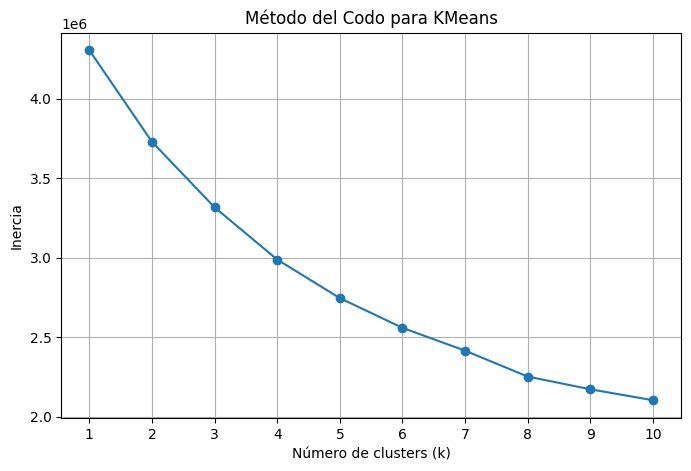

In [15]:
# Determinar el número óptimo de clusters usando el método del codo
inertia = []
k_range = range(1, 11)
print("Calculando método del codo.")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para KMeans')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid()
plt.show()

## 5. Evaluación


Promedios por Cluster:


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN,CNT_FAM_MEMBERS,OWN_CAR_AGE,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
Cluster,,,,,,,,,,,,,,,
0,233366.41,1129284.96,44091.80,1027703.57,-16530.48,42902.21,0.24,2.04,9.95,1.87,0.03,0.58,0.58,0.53,0.06
1,159099.39,484567.83,24114.12,430075.61,-13184.44,840.74,1.47,3.37,12.81,2.12,0.02,0.43,0.49,0.49,0.10
2,143636.81,408047.75,20689.92,363148.27,-17094.09,101695.08,0.03,1.66,13.06,2.11,0.02,0.50,0.49,0.51,0.08



Riesgo por Cluster (Tasa de Incumplimiento):


,Tasa_Incumplimiento,Cantidad_Clientes
Cluster,,
1,0.098378,72516
2,0.084459,161262
0,0.055213,73733


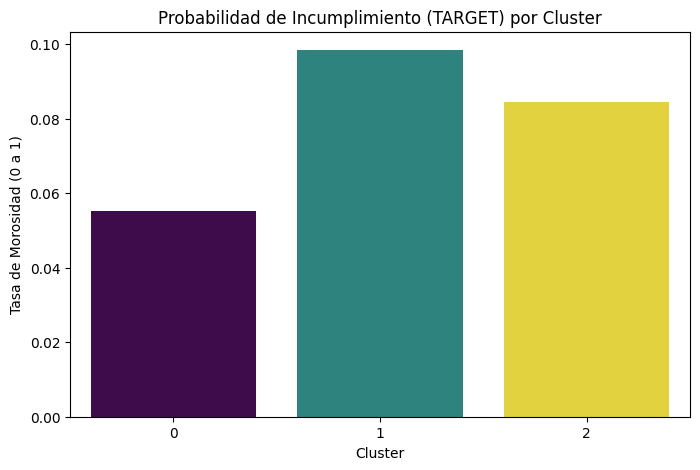

In [ ]:
# A partir del gráfico del codo, seleccionamos k=3 como número óptimo de clusters
k_optimo = 3
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

# Añadimos la columna de clusters al DataFrame original
df['Cluster'] = clusters

# Caracterización de los clusters
cols_perfil = features + ['TARGET'] 
perfil_promedio = df.groupby('Cluster')[cols_perfil].mean()
print("\nPromedios por Cluster:")
display(round(perfil_promedio,2))


# Análisis del perfil promedio de cada cluster
riesgo_por_cluster = df.groupby('Cluster')['TARGET'].agg(['mean','count']).reset_index()
riesgo_por_cluster.columns = ['Cluster', 'Tasa_Incumplimiento', 'Cantidad_Clientes']

# Ordenar por tasa de incumplimiento
riesgo_por_cluster = riesgo_por_cluster.sort_values('Tasa_Incumplimiento', ascending=False).set_index('Cluster')

print("\nRiesgo por Cluster (Tasa de Incumplimiento):")
display(riesgo_por_cluster)

# Visualización del riesgo
plt.figure(figsize=(8, 5))


sns.barplot(
    x='Cluster', 
    y='Tasa_Incumplimiento', 
    hue='Cluster', 
    data=riesgo_por_cluster, 
    palette='viridis', 
    legend=False
)

plt.title('Probabilidad de Incumplimiento (TARGET) por Cluster')
plt.ylabel('Tasa de Morosidad (0 a 1)')
plt.show()